In [1]:
from scrape import get_results
from scrape import get_data
from scrape import grab_years_played
from scrape import revised_run
from scrape import train_test
from scrape import read_adps

2022 WR Projections

In [2]:
X_train2022, X_test2022 = train_test('qb', num_years=5, year_for=2022)
results = revised_run(X_train2022, X_test2022, 'qb', year_for='2022')
results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 4.909597083460335
======= Fold 1 ========
Our accuracy on the validation set is 4.642728848140141
======= Fold 2 ========
Our accuracy on the validation set is 3.883103599925491
======= Fold 3 ========
Our accuracy on the validation set is 5.89218004819971
======= Fold 4 ========
Our accuracy on the validation set is 6.568142115479252
Overall accuracy: 5.179150339040985
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)


,name,proj fpts,class,rank,last rank
0,jalen-hurts,26.943201,1,1,3
1,patrick-mahomes,21.801324,0,2,1
2,justin-fields,21.636923,1,3,6
3,daniel-jones,21.236591,1,4,9
4,joe-burrow,20.904637,0,5,4
5,josh-allen-qb,20.709079,1,6,2
6,trevor-lawrence,20.406595,0,7,8
7,geno-smith,19.611966,2,8,5
8,tua-tagovailoa,19.106845,0,9,14
9,justin-herbert,18.606088,0,10,11


======= Fold 0 ========
Our accuracy on the validation set is 4.541098435400842
======= Fold 1 ========
Our accuracy on the validation set is 4.0915889165541754
======= Fold 2 ========
Our accuracy on the validation set is 3.9765258571845283
======= Fold 3 ========
Our accuracy on the validation set is 5.776099502630276
======= Fold 4 ========
Our accuracy on the validation set is 4.833640738171827
Overall accuracy: 4.64379068998833
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)


,name,proj fpts,class,rank,last rank
0,josh-allen-qb,23.4662,1,1,2
1,joe-burrow,22.5338,0,2,4
2,jalen-hurts,21.8740,1,3,3
3,justin-fields,21.6156,1,4,6
4,lamar-jackson,21.4248,1,5,13
5,patrick-mahomes,20.9410,0,6,1
6,trevor-lawrence,20.7146,0,7,8
7,justin-herbert,19.0350,0,8,11
8,dak-prescott,18.7736,0,9,17
9,deshaun-watson,18.5128,3,10,30


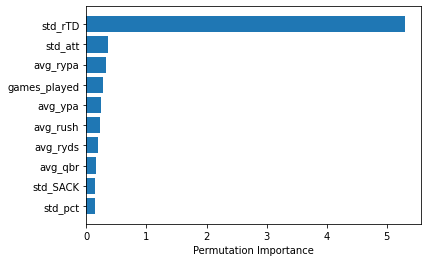

In [3]:
results = revised_run(X_train2022, X_test2022, 'qb', model_ = 'rf', pca=False)
results.head(50)

In [4]:
results = revised_run(X_train2022, X_test2022, 'qb', model_ = 'svr')
results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 4.514801770054255
======= Fold 1 ========
Our accuracy on the validation set is 4.671482061205088
======= Fold 2 ========
Our accuracy on the validation set is 4.197351910802719
======= Fold 3 ========
Our accuracy on the validation set is 5.240635579041256
======= Fold 4 ========
Our accuracy on the validation set is 7.033407035773752
Overall accuracy: 5.131535671375414
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)


,name,proj fpts,class,rank,last rank
0,jalen-hurts,22.745093,1,1,3
1,josh-allen-qb,20.936622,1,2,2
2,patrick-mahomes,20.853152,0,3,1
3,joe-burrow,20.831709,0,4,4
4,daniel-jones,20.641937,1,5,9
5,trevor-lawrence,20.621168,0,6,8
6,justin-fields,19.896056,1,7,6
7,lamar-jackson,18.764791,1,8,13
8,kyler-murray,18.316265,1,9,18
9,dak-prescott,17.968901,0,10,17
